<a href="https://colab.research.google.com/github/akheel143/Face_mask_detection/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

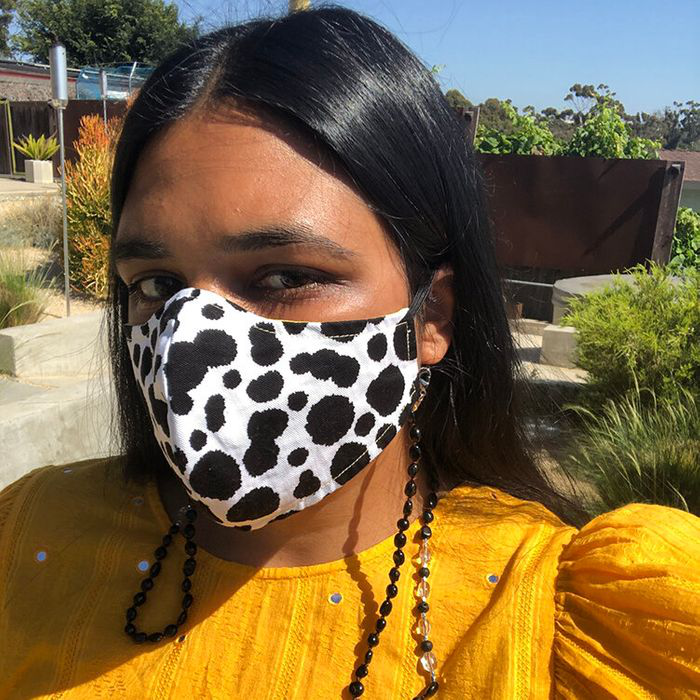

(700, 700, 3)

In [1]:
import PIL
from google.colab.patches import cv2_imshow
import cv2
img=cv2.imread('/content/drive/MyDrive/face_mask dataset/with_mask/image_1.png') 
cv2_imshow(img)
img.shape

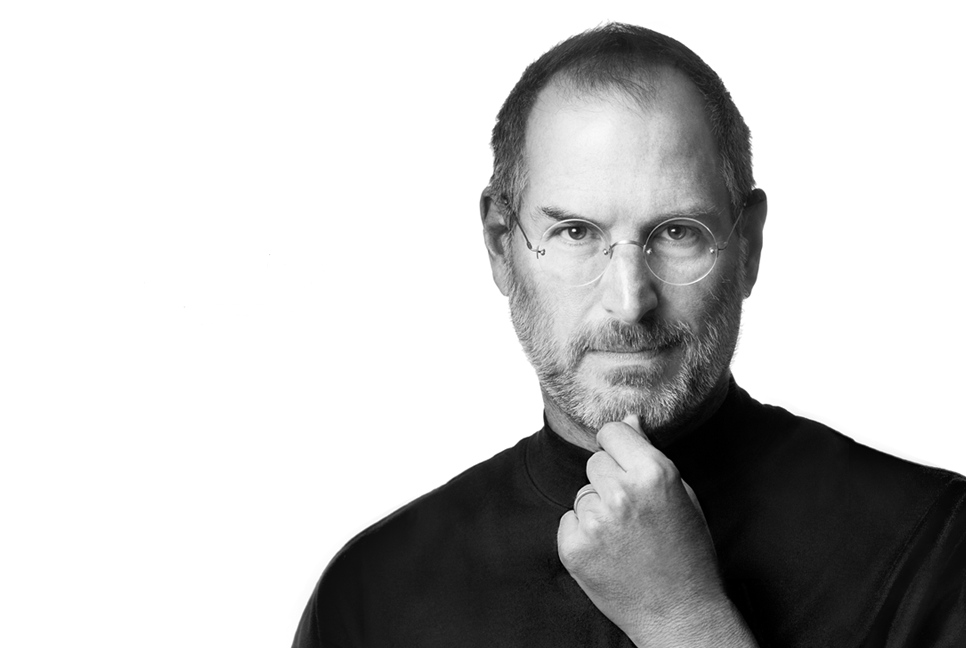

(648, 966, 3)

In [2]:
img1=cv2.imread('/content/drive/MyDrive/face_mask dataset/without_mask/image_0.png') 
cv2_imshow(img1)
img1.shape

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [72]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
    rotation_range=40,                                                           
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [64]:
val_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [84]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/face_mask dataset',
                                          target_size=(600,600),
                                          batch_size=20,
                                          class_mode='categorical',
                                          subset='training')

val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/face_mask dataset',
                                          target_size=(600,600),
                                          batch_size=20,
                                          class_mode='categorical',
                                          subset='validation')

Found 352 images belonging to 2 classes.
Found 88 images belonging to 2 classes.


In [74]:
class_indices = {}
for key in train_generator.class_indices.keys():
    class_indices[train_generator.class_indices[key]] = key
    
print(class_indices)

{0: 'with_mask', 1: 'without_mask'}


In [80]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout

In [85]:
model =Sequential()
   
model.add(Conv2D(32,(3,3), padding='same', input_shape=(600,600,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 600, 600, 32)      896       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 300, 300, 32)      0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 300, 300, 64)      18496     
_________________________________________________________________
dropout_42 (Dropout)         (None, 300, 300, 64)      0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 150, 150, 64)      0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1440000)           0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)              

In [86]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
epochs=10
history = model.fit(train_generator, epochs=epochs,validation_data=val_generator)

Epoch 1/10
18/18 [==============================] - 36s 2s/step - loss: 0.4874 - accuracy: 0.8125 - val_loss: 0.4387 - val_accuracy: 0.8409
Epoch 2/10
18/18 [==============================] - 35s 2s/step - loss: 0.4945 - accuracy: 0.8352 - val_loss: 0.4832 - val_accuracy: 0.8636
Epoch 3/10
18/18 [==============================] - 35s 2s/step - loss: 0.4431 - accuracy: 0.7926 - val_loss: 0.4425 - val_accuracy: 0.8295
Epoch 4/10
18/18 [==============================] - 35s 2s/step - loss: 0.4250 - accuracy: 0.8210 - val_loss: 0.4376 - val_accuracy: 0.8523
Epoch 5/10
18/18 [==============================] - 35s 2s/step - loss: 0.4158 - accuracy: 0.8153 - val_loss: 0.3948 - val_accuracy: 0.8750
Epoch 6/10
18/18 [==============================] - 35s 2s/step - loss: 0.4123 - accuracy: 0.8295 - val_loss: 0.3663 - val_accuracy: 0.8750
Epoch 7/10
18/18 [==============================] - 35s 2s/step - loss: 0.3803 - accuracy: 0.8494 - val_loss: 0.3363 - val_accuracy: 0.8750
Epoch 8/10
18/18 [==

In [156]:
ss=model.evaluate(val_generator)

5/5 [==============================] - 7s 1s/step - loss: 0.3911 - accuracy: 0.8295


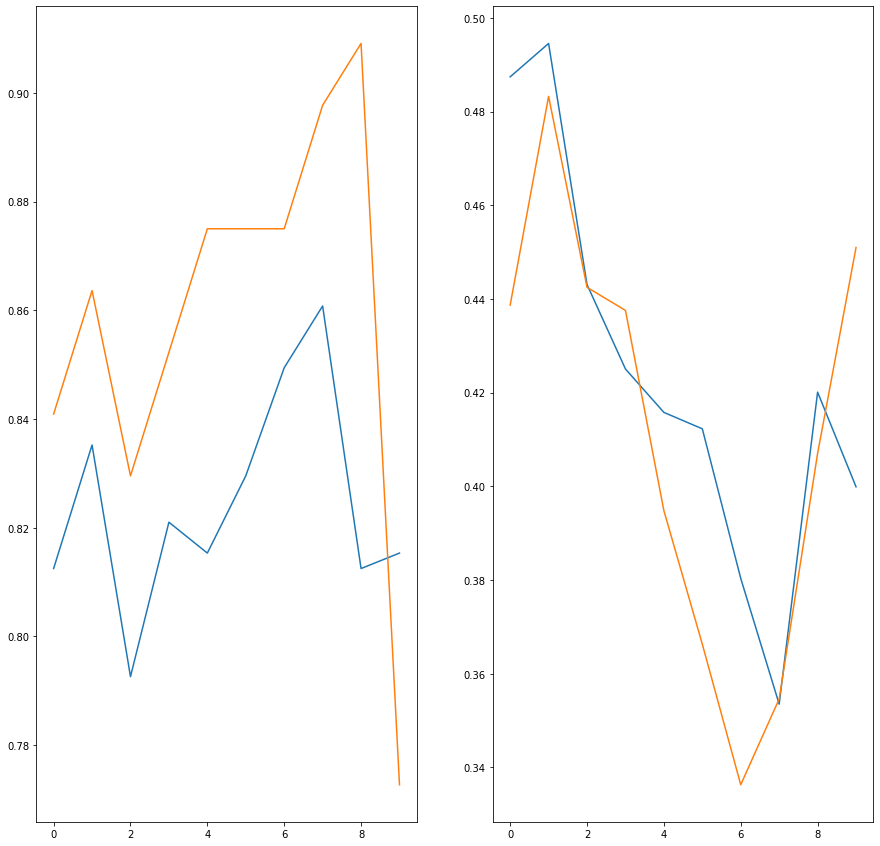

In [112]:
import matplotlib.pyplot as plt

epoch=range(epochs)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)#rows,cols,index
plt.plot(epoch,history.history['accuracy'])
plt.plot(epoch,history.history['val_accuracy'])

plt.subplot(1,2,2)
plt.plot(epoch,history.history['loss'])
plt.plot(epoch,history.history['val_loss'])

plt.show()

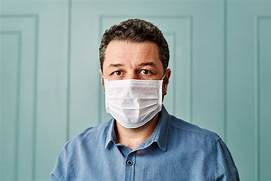

In [157]:
img=cv2.imread('/content/masked.jfif') 
cv2_imshow(img)

In [162]:
from tensorflow import keras

In [163]:
mask_man="/content/masked.jfif"

img=keras.preprocessing.image.load_img(mask_man,target_size=(600,600))
img_array=keras.preprocessing.image.img_to_array(img)
img_array=tf.expand_dims(img_array,0)

prediction=model.predict(img_array)

In [164]:
score=tf.nn.softmax(prediction)
score

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.73105854, 0.26894143]], dtype=float32)>

In [165]:
import numpy as np

print(
    "This image most likely belongs to {} with a {:.2f} perc confidenc."
    .format(class_indices[np.argmax(score)],100*np.max(score))
    )

This image most likely belongs to with_mask with a 73.11 perc confidenc.
